In [1]:
from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName("app2").getOrCreate()
sc = spark.sparkContext
spark
sc


<SparkContext master=local[*] appName=app2>

1. PySpark Join Syntax
PySpark SQL join has a below syntax and it can be accessed directly from DataFrame.


                        join(self, other, on=None, how=None)


join() operation takes parameters as below and returns DataFrame.

param other: Right side of the join
param on: a string for the join column name
param how: default ```inner```. Must be one of ````inner````, ```cross```,``` outer,full```, ```full_outer```, ````left````, ```left_outer```, ```right```, ```right_outer```, ```left_semi```, and ```left_anti```.

2. PySpark Join Types
Below are the different Join Types PySpark supports.

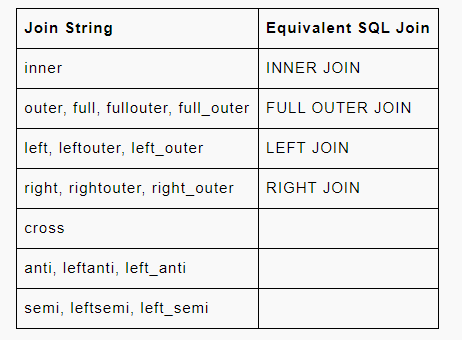

Before we jump into PySpark SQL Join examples, first, let’s create an "emp" and "dept" DataFrames. here, column "emp_id" is unique on emp and "dept_id" is unique on the dept dataset’s and emp_dept_id from emp has a reference to dept_id on dept dataset.

In [2]:

emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)

dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)


root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----